In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../dataset/Cleaned/Cleaned_NewYork_100.csv')

In [4]:
print(df.describe())

               Date  A1_MaxT_degC  A1_MinT_degC  A1_MeanT_degC  A2_MaxT_degC  \
count  1.000000e+02    100.000000    100.000000     100.000000    100.000000   
mean   1.718798e+18     23.818000     22.963000      23.370000     23.689000   
std    2.506593e+15      4.126641      4.158226       4.133468      4.121339   
min    1.714522e+18     14.400000     13.400000      14.000000     14.000000   
25%    1.716660e+18     22.375000     21.275000      21.900000     22.400000   
50%    1.718798e+18     24.600000     23.750000      24.150000     24.100000   
75%    1.720937e+18     27.300000     26.600000      26.900000     27.225000   
max    1.723075e+18     29.100000     28.300000      28.700000     29.200000   

       A2_MinT_degC  A2_MeanT_degC  A_MaxSC_degC  A_MinSC_degC  A_MeanSC_degC  \
count    100.000000     100.000000     100.00000    100.000000     100.000000   
mean      22.874000      23.202000     262.04000    231.194000     244.505000   
std        4.116943       4.087922  

## Threshold based Alert Alogirthm(TBA)

In [17]:
class ThresholdAlerts:
    def __init__(self, data, thresholds):
        self.data = data
        self.thresholds = thresholds
    
    def apply_alerts(self):
        alerts = {}
        for column, (min_threshold, max_threshold) in self.thresholds.items():
            alerts[column] = self.data[(self.data[column] < min_threshold) | (self.data[column] > max_threshold)]
        return alerts

def find_high_severity_alerts(df, thresholds):
    high_severity = {}
    for column, (min_threshold, max_threshold) in thresholds.items():
        high_severity[column] = {
            'BelowMin_Count': df[f'{column}_BelowMin'].sum(),
            'AboveMax_Count': df[f'{column}_AboveMax'].sum()
        }
    return high_severity

def plot_alerts(df, column):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df[column], label='Data')
    plt.plot(pd.to_datetime(df['Date']), df[f'{column}_BelowMin'] * df[column].max(), 'r', linestyle='--', label='Below Min Threshold')
    plt.plot(pd.to_datetime(df['Date']), df[f'{column}_AboveMax'] * df[column].max(), 'g', linestyle='--', label='Above Max Threshold')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} Threshold Breaches Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
thresholds = {
    'A1_MaxT_degC': (10, 20),
    'E_MeanT_degC': (5, 15)
}
alerts = ThresholdAlerts(df, thresholds).apply_alerts()

In [19]:
print("Threshold-based Alerts:")
for column, alert_data in alerts.items():
    print(f"\nAlerts for {column}:")
    print(alert_data)

Threshold-based Alerts:

Alerts for A1_MaxT_degC:
                   Date  A1_MaxT_degC  A1_MinT_degC  A1_MeanT_degC  \
19  1716163200000000000          20.5          18.5           19.2   
20  1716249600000000000          21.2          19.4           20.2   
21  1716336000000000000          21.9          20.4           21.2   
22  1716422400000000000          22.7          21.6           22.1   
23  1716508800000000000          22.7          21.8           22.3   
..                  ...           ...           ...            ...   
95  1722729600000000000          27.9          27.1           27.4   
96  1722816000000000000          28.0          27.3           27.6   
97  1722902400000000000          27.7          26.5           27.3   
98  1722988800000000000          26.5          25.7           26.1   
99  1723075200000000000          25.9          25.4           25.6   

    A2_MaxT_degC  A2_MinT_degC  A2_MeanT_degC  A_MaxSC_degC  A_MinSC_degC  \
19          20.4          18.3  

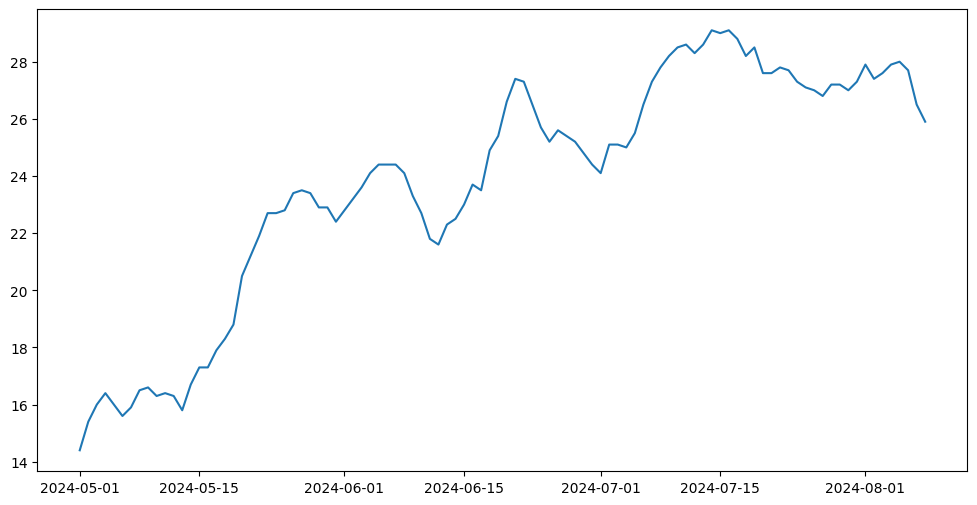

In [22]:
try:
    for column in thresholds.keys():
        plot_alerts(df, column)
except:
    pass

## Rule Based Systems

In [10]:
class RuleBasedSystem:
    def __init__(self, data):
        self.data = data
    
    def apply_rules(self):
        # Example rule: Flag records where the temperature exceeds a certain value
        self.data['High_Temperature_Flag'] = self.data['A1_MaxT_degC'] > 15
        return self.data

In [11]:
df_with_flags = RuleBasedSystem(df).apply_rules()
# print(df_with_flags)

                   Date  A1_MaxT_degC  A1_MinT_degC  A1_MeanT_degC  \
0   1714521600000000000          14.4          13.4           14.0   
1   1714608000000000000          15.4          14.4           14.8   
2   1714694400000000000          16.0          15.4           15.6   
3   1714780800000000000          16.4          15.5           16.0   
4   1714867200000000000          16.0          15.0           15.6   
..                  ...           ...           ...            ...   
95  1722729600000000000          27.9          27.1           27.4   
96  1722816000000000000          28.0          27.3           27.6   
97  1722902400000000000          27.7          26.5           27.3   
98  1722988800000000000          26.5          25.7           26.1   
99  1723075200000000000          25.9          25.4           25.6   

    A2_MaxT_degC  A2_MinT_degC  A2_MeanT_degC  A_MaxSC_degC  A_MinSC_degC  \
0           14.0          13.1           13.7         229.0         206.0   
1    

## Ensemble Forecasting

In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class EnsembleForecasting:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.models = [RandomForestRegressor(), GradientBoostingRegressor()]
    
    def train_and_evaluate(self):
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        for model in self.models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(f'{model.__class__.__name__} MSE: {mean_squared_error(y_test, y_pred)}')


In [13]:
ef = EnsembleForecasting(df, 'E_MeanT_ft^3/s')
ef.train_and_evaluate()

RandomForestRegressor MSE: 1856.2303050000003
GradientBoostingRegressor MSE: 1345.4585873636893


## Data Assimilation Algorithm

In [ ]:
class DataAssimilation:
    def __init__(self, *datasets):
        self.datasets = datasets
    
    def combine_data(self):
        combined_df = pd.concat(self.datasets, axis=1)
        return combined_df


In [ ]:
# Assuming you have multiple dataframes to combine
# combined_data = DataAssimilation(df1, df2).combine_data()

## LSTM Nets

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

class LSTMNetwork:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.scaler = MinMaxScaler(feature_range=(0, 1))
    
    def preprocess_data(self):
        scaled_data = self.scaler.fit_transform(self.data)
        return scaled_data
    
    def create_model(self, input_shape):
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
        model.add(LSTM(50))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
    
    def train(self):
        scaled_data = self.preprocess_data()
        # Additional steps for creating training and testing datasets
        model = self.create_model(input_shape=(scaled_data.shape[1], 1))
        # Fit model with training data


In [16]:
lstm = LSTMNetwork(df, 'E_MeanT_ft^3/s')
lstm.train()

## Bayesian Nets

In [ ]:
import pomegranate as pm

class BayesianNetwork:
    def __init__(self, data):
        self.data = data
    
    def create_network(self):
        # Define the structure and nodes of the Bayesian Network
        # Example structure and nodes
        pass


In [ ]:
bn = BayesianNetwork(df)
bn.create_network()